In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ast
from collections import Counter

# Recipe Recommendation System
### Could it recommend a subtitle too?

## part 1 - Datasets and EDA

https://www.kaggle.com/datasets/elisaxxygao/foodrecsysv1

### 1.0 Recipes

In [3]:
recipes = pd.read_csv("data/foodRecSys-V1_kaggle/raw-data_recipe.csv")
recipes

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.625000,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.500000,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2945555: {'rating': 5, 'followersCount': 6690..."
...,...,...,...,...,...,...,...,...,...
49693,222886,Grateful Dead Cocktail,3.500000,https://images.media-allrecipes.com/userphotos...,4,fluid ounce tequila^fluid ounce vodka^fluid ou...,{'directions': u'Prep\n5 m\nReady In\n5 m\nCom...,"{u'niacin': {u'hasCompleteData': False, u'name...","{2043209: {'rating': 5, 'followersCount': 1509..."
49694,25650,Cheese Filling For Pastries,4.333333,https://images.media-allrecipes.com/userphotos...,3,raisins^brandy^cream cheese^white sugar^all-pu...,{'directions': u'Prep\n15 m\nReady In\n15 m\nS...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1380296: {'rating': 4, 'followersCount': 0, '..."
49695,23544,Peach Smoothie,3.615385,https://images.media-allrecipes.com/userphotos...,21,sliced peaches drained^scoops vanilla ice crea...,{'directions': u'Prep\n1 m\nReady In\n1 m\nIn ...,"{u'niacin': {u'hasCompleteData': False, u'name...","{6412992: {'rating': 4, 'followersCount': 7, '..."
49696,170710,Double Dare Peaches,4.714286,https://images.media-allrecipes.com/userphotos...,19,butter^habanero peppers^fresh peaches^brown su...,{'directions': u'Prep\n20 m\nCook\n10 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2381248: {'rating': 5, 'followersCount': 2, '..."


In [4]:
recipes.dtypes

recipe_id               int64
recipe_name            object
aver_rate             float64
image_url              object
review_nums             int64
ingredients            object
cooking_directions     object
nutritions             object
reviews                object
dtype: object

In [26]:
recipes.describe().T

,count,mean,std,min,25%,50%,75%,max
recipe_id,49698.0,131092.695119,98230.166389,6663.0,22244.250000,142057.500000,231644.750000,262956.0
aver_rate,49698.0,4.311699,0.485282,0.0,4.081311,4.411765,4.622239,5.0
review_nums,49698.0,76.342408,282.160920,1.0,6.000000,17.000000,54.000000,11191.0


In [5]:
recipes.reviews[0]

'{8542392: {\'rating\': 5, \'followersCount\': 11, \'madeRecipesCount\': 18, \'favoritesCount\': 200, \'dateLastModified\': u\'2017-04-22T12:46:43.663\', \'text\': u"Best breakfast ever! I ran out of paprika while seasoning, so I used garlic piercer on the other half of the batch. Very good! Can\'t wait to make it again... and figure out how to use the drippings!", \'followingCount\': 0}, 11174581: {\'rating\': 5, \'followersCount\': 8, \'madeRecipesCount\': 55, \'favoritesCount\': 101, \'dateLastModified\': u\'2013-06-20T15:50:25.96\', \'text\': u"Awesome!\\nIt\'s amazing.", \'followingCount\': 0}, 8262477: {\'rating\': 5, \'followersCount\': 0, \'madeRecipesCount\': 1, \'favoritesCount\': 52, \'dateLastModified\': u\'2015-02-14T07:27:51.307\', \'text\': u\'The flavors came together well and it really was simple to prepare. My husband and I both enjoyed it!\', \'followingCount\': 0}}\n'

In [6]:
recipes = recipes.drop(columns = ["image_url", "nutritions"])

In [7]:
recipes.ingredients = recipes.ingredients.str.split("^")

In [8]:
recipes.ingredients[0]

['pork belly', 'smoked paprika', 'kosher salt', 'ground black pepper']

In [9]:
recipes.cooking_directions = recipes.cooking_directions.apply(ast.literal_eval)

In [10]:
# Make sure there is only "directions" info
assert(recipes.cooking_directions.apply(lambda x: len(x.keys()) == 1).all())
assert(recipes.cooking_directions.apply(lambda x: list(x.keys())[0] == "directions").all())

In [11]:
# reduce to string
recipes.cooking_directions = recipes.cooking_directions.apply(lambda x: list(x.values())[0])

In [12]:
type(recipes.cooking_directions[0])

str

In [13]:
recipes[recipes.recipe_id == 6667]

,recipe_id,recipe_name,aver_rate,review_nums,ingredients,cooking_directions,reviews
40594,6667,Cornish Splits,4.333333,87,"[active dry yeast, lukewarm milk, white sugar,...","In a small bowl, dissolve the yeast in the mil...","{3045389: {'rating': 1, 'followersCount': 3, '..."


In [14]:
# pretty print recipe with matching image by id

In [15]:
# [item for row in matrix for item in row]

In [16]:
ingredients_flat = [ingredient for recipe in recipes.ingredients for ingredient in recipe]

In [17]:
ingredients_counter = Counter(ingredients_flat)

In [18]:
len(ingredients_counter)

38131

In [19]:
ingredients_counter.total()

454274

In [20]:
ingredients_counter.most_common(10)

[('salt', 15070),
 ('butter', 13263),
 ('white sugar', 13032),
 ('all-purpose flour', 10257),
 ('garlic', 8113),
 ('water', 7626),
 ('olive oil', 7531),
 ('vanilla extract', 6507),
 ('milk', 6258),
 ('eggs', 5856)]

In [21]:
ingredients_counter.most_common()[-20:]

[('jalapeno-stuffed green olives', 1),
 ('fluid ounce) jiggers premium tequila', 1),
 ('fluid ounce) jigger orange liqueur', 1),
 ('fluid ounce) jigger sweetened lime juice', 1),
 ('fluid ounces beer (such as Miller® High Life®)', 1),
 ('fluid ounces cola-flavored carbonated beverage (such as Coca-Cola®)', 1),
 ('fresh red currants', 1),
 ('fluid ounces liquid fruit pectin', 1),
 ('Almond Breeze Coconutmilk Almondmilk Original Unsweetened', 1),
 ('Meyer lemon juiced and peeled', 1),
 ('fluid ounces spiced rum (such as Kraken®)', 1),
 ('fluid ounce freshly squeezed orange juice', 1),
 ('fluid ounce white rum (such as Captain Morgan™)', 1),
 ("fluid ounce dark rum (such as Myers's®)", 1),
 ('fluid ounce hibiscus syrup', 1),
 ('fluid ounce almond orgeat syrup (such as Torani®)', 1),
 ('black beans drained and liquid reserved', 1),
 ('fluid ounces reduced calorie cranberry juice cocktail', 1),
 ('fluid ounces reduced calorie lemonade', 1),
 ('crushed jalapeno and habanero peanut brittle (s

measuring units, brands and preparation methods (squeezed) to be removed for accurate counting -> text processing instead of naive vectorization

from i don't remember which article mean(embedding_title, embedding_ingredients, embedding_directions)

In [22]:
top_20 = ingredients_counter.most_common(20)
most_common_keys = list(reversed([x[0] for x in top_20]))
most_common_counts = list(reversed([x[1] for x in top_20]))

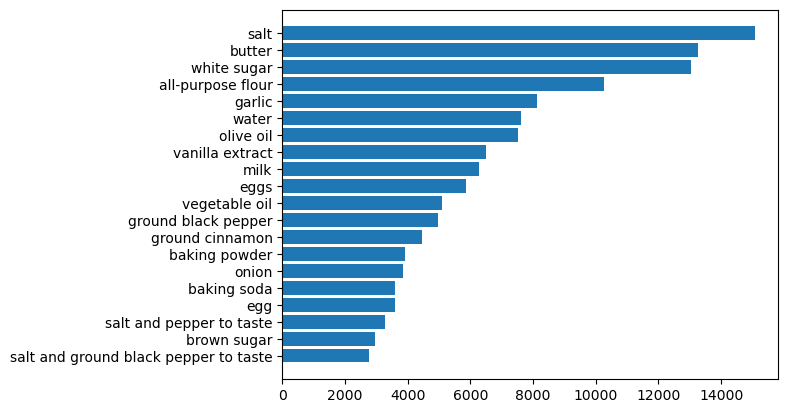

In [23]:
plt.barh(most_common_keys, most_common_counts)
plt.show()

### 2.0 Ratings

In [49]:
interactions = pd.read_csv("data/foodRecSys-V1_kaggle/raw-data_interaction.csv")
interactions

,user_id,recipe_id,rating,dateLastModified
0,8542392,222388,5,2017-04-22T12:46:43.663\n
1,11174581,222388,5,2013-06-20T15:50:25.96\n
2,8262477,222388,5,2015-02-14T07:27:51.307\n
3,3574785,240488,5,2017-10-07T18:20:08.973\n
4,12145410,240488,2,2018-01-06T00:06:09.563\n
...,...,...,...,...
3793998,12318233,170710,5,2013-11-03T11:09:47.763\n
3793999,51226,170710,5,2009-07-18T19:33:36.317\n
3794000,1476783,170710,5,2009-07-27T10:21:45.823\n
3794001,1245064,79774,4,2006-01-21T20:57:09.327\n


In [50]:
interactions.dtypes

user_id              int64
recipe_id            int64
rating               int64
dateLastModified    object
dtype: object

In [52]:
interactions.dateLastModified = pd.to_datetime(interactions.dateLastModified, format = "ISO8601")

In [54]:
interactions.describe().T

,count,mean,min,25%,50%,75%,max,std
user_id,3794003.0,4860242.781291,16.0,1404674.0,2954489.0,6384689.0,23463743.0,5010314.802679
recipe_id,3794003.0,61121.799155,6663.0,14235.0,23390.0,78649.0,262956.0,71787.206572
rating,3794003.0,4.513192,1.0,4.0,5.0,5.0,5.0,0.875418
dateLastModified,3794003,2010-10-22 14:10:57.267878656,2000-02-07 21:06:30.137000,2008-02-25 06:23:30.880000,2010-10-25 12:15:48.150000128,2013-12-24 06:31:24.813499904,2018-03-16 07:19:52.260000,NaN


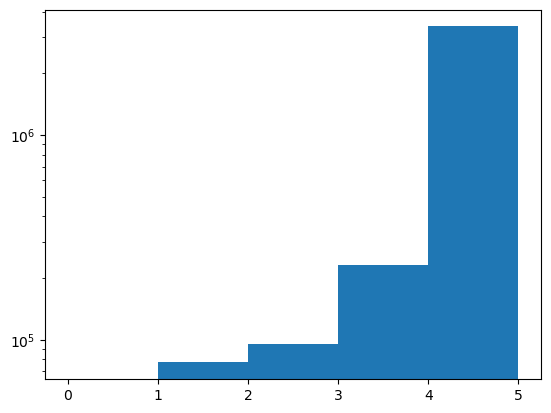

In [64]:
plt.hist(interactions.rating, bins = range(6),)
plt.semilogy()
plt.show()

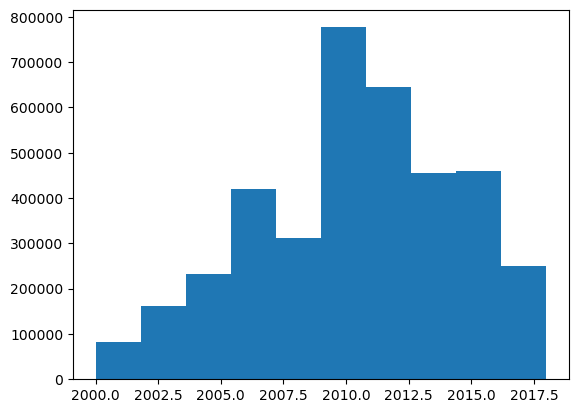

In [58]:
plt.hist(interactions.dateLastModified.dt.year)
plt.show()